In [2]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
import tensorflow as tf

In [3]:
num_classes = 4
img_rows, img_cols = 224, 224

In [4]:
vgg = VGG16(include_top=False, input_shape=(img_rows, img_cols, 3))

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
vgg.layers

In [8]:
def build_model(pre_model):
    model = Flatten()(pre_model.output)
    d1 = Dense(2048, activation='relu')(model)
    d2 = Dense(512, activation='relu')(d1)
    d3 = Dense(128, activation='relu')(d2)
    d4 = Dense(64, activation='relu')(d3)
    output = Dense(num_classes, activation='softmax')(d4)
    return Model(inputs=pre_model.input, outputs=output)

In [9]:
face_recog_model = build_model(vgg)

In [10]:
face_recog_model.outputs

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_4')>]

In [11]:
face_recog_model.inputs


[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>]

In [12]:
face_recog_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [13]:
train_path = 'images/train_set/'
valid_path = 'images/validation_set/'

In [14]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical')


Found 120 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical')

Found 40 images belonging to 4 classes.


In [18]:
training_set.class_indices

{'class-0': 0, 'class-1': 1, 'class-2': 2, 'class-3': 3}

In [19]:
test_set.class_indices

{'class-0': 0, 'class-1': 1, 'class-2': 2, 'class-3': 3}

In [20]:
test_set

In [21]:
test_set.data_format

'channels_last'

In [22]:
test_set.filepaths

['images/validation_set/class-0\\34.jpg',
 'images/validation_set/class-0\\43.jpg',
 'images/validation_set/class-0\\46.jpg',
 'images/validation_set/class-0\\47.jpg',
 'images/validation_set/class-0\\48.jpg',
 'images/validation_set/class-0\\49.jpg',
 'images/validation_set/class-0\\51.jpg',
 'images/validation_set/class-0\\aug_0_281.jpg',
 'images/validation_set/class-0\\aug_0_5837.jpg',
 'images/validation_set/class-0\\aug_0_9538.jpg',
 'images/validation_set/class-1\\10.jpg',
 'images/validation_set/class-1\\20.jpg',
 'images/validation_set/class-1\\9.jpg',
 'images/validation_set/class-1\\aug_0_105.jpg',
 'images/validation_set/class-1\\aug_0_3073.jpg',
 'images/validation_set/class-1\\aug_0_313.jpg',
 'images/validation_set/class-1\\aug_0_3521.jpg',
 'images/validation_set/class-1\\aug_0_3834.jpg',
 'images/validation_set/class-1\\aug_0_3883.jpg',
 'images/validation_set/class-1\\aug_0_9843.jpg',
 'images/validation_set/class-2\\15.jpg',
 'images/validation_set/class-2\\18.jpg',


In [23]:
training_set

In [24]:
training_set.data_format

'channels_last'

In [25]:
training_set.filepaths

['images/train_set/class-0\\18.jpg',
 'images/train_set/class-0\\19.jpg',
 'images/train_set/class-0\\20.jpg',
 'images/train_set/class-0\\21.jpg',
 'images/train_set/class-0\\22.jpg',
 'images/train_set/class-0\\23.jpg',
 'images/train_set/class-0\\24.jpg',
 'images/train_set/class-0\\25.jpg',
 'images/train_set/class-0\\26.jpg',
 'images/train_set/class-0\\27.jpg',
 'images/train_set/class-0\\28.jpg',
 'images/train_set/class-0\\29.jpg',
 'images/train_set/class-0\\30.jpg',
 'images/train_set/class-0\\31.jpg',
 'images/train_set/class-0\\32.jpg',
 'images/train_set/class-0\\33.jpg',
 'images/train_set/class-0\\35.jpg',
 'images/train_set/class-0\\37.jpg',
 'images/train_set/class-0\\38.jpg',
 'images/train_set/class-0\\39.jpg',
 'images/train_set/class-0\\40.jpg',
 'images/train_set/class-0\\41.jpg',
 'images/train_set/class-0\\42.jpg',
 'images/train_set/class-0\\44.jpg',
 'images/train_set/class-0\\45.jpg',
 'images/train_set/class-0\\50.jpg',
 'images/train_set/class-0\\aug_0_1155

In [26]:
training_set.directory

'images/train_set/'

In [27]:
face_recog_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [28]:
train_datagen

In [29]:
r = face_recog_model.fit_generator(training_set, validation_data=test_set, epochs=20, steps_per_epoch=len(training_set), validation_steps=len(test_set), verbose=1)

C:\Users\bluep\AppData\Local\Temp\ipykernel_9576\1498896091.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = face_recog_model.fit_generator(training_set, validation_data=test_set, epochs=20, steps_per_epoch=len(training_set), validation_steps=len(test_set), verbose=1)


Epoch 1/20


4/4 [==============================] - 89s 22s/step - loss: 1.4517 - accuracy: 0.3083 - val_loss: 1.1927 - val_accuracy: 0.4250
Epoch 2/20
4/4 [==============================] - 75s 19s/step - loss: 1.1524 - accuracy: 0.5667 - val_loss: 0.8255 - val_accuracy: 0.8750
Epoch 3/20
4/4 [==============================] - 73s 19s/step - loss: 0.8320 - accuracy: 0.7667 - val_loss: 0.5819 - val_accuracy: 0.9500
Epoch 4/20
4/4 [==============================] - 65s 16s/step - loss: 0.6431 - accuracy: 0.9167 - val_loss: 0.3966 - val_accuracy: 0.9750
Epoch 5/20
4/4 [==============================] - 65s 16s/step - loss: 0.5071 - accuracy: 0.9000 - val_loss: 0.3069 - val_accuracy: 0.9750
Epoch 6/20
4/4 [==============================] - 60s 15s/step - loss: 0.3166 - accuracy: 0.9750 - val_loss: 0.1964 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 79s 20s/step - loss: 0.2431 - accuracy: 0.9667 - val_loss: 0.2082 - val_accuracy: 0.9500
Epoch 8/20
4/4 [======================

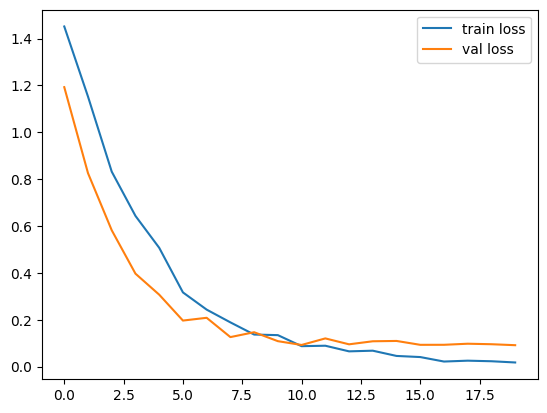

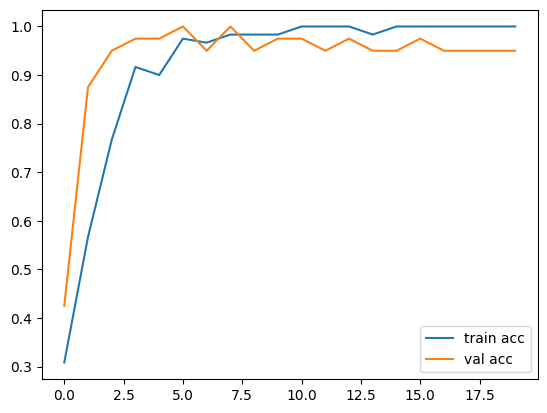

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
r

In [33]:
r.history

{'loss': [1.45510733127594,
  1.0185065269470215,
  0.7291385531425476,
  0.5307721495628357,
  0.34930840134620667,
  0.21528339385986328,
  0.15298816561698914,
  0.10545700043439865,
  0.09926296025514603,
  0.08499722182750702],
 'accuracy': [0.22499999403953552,
  0.6083333492279053,
  0.75,
  0.8416666388511658,
  0.8833333253860474,
  0.9666666388511658,
  0.9750000238418579,
  1.0,
  0.9750000238418579,
  0.9833333492279053],
 'val_loss': [1.1297863721847534,
  0.7161309719085693,
  0.44553476572036743,
  0.3068229556083679,
  0.21066740155220032,
  0.1527736932039261,
  0.14679020643234253,
  0.12132109701633453,
  0.1158536896109581,
  0.11990056186914444],
 'val_accuracy': [0.3499999940395355,
  0.800000011920929,
  0.925000011920929,
  0.949999988079071,
  0.949999988079071,
  0.9750000238418579,
  0.9750000238418579,
  0.9750000238418579,
  0.949999988079071,
  0.9750000238418579]}

In [34]:
r.model

In [35]:
r.params

{'verbose': 1, 'epochs': 10, 'steps': 4}

In [36]:
r.validation_data

In [37]:
residuals = ResNet50(include_top=False, input_shape=(img_rows, img_cols, 3))

94765736/94765736 [==============================] - 12s 0us/step


In [38]:
residuals.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [39]:
# save model
face_recog_model.save('face_recog_model.h5')

c:\Users\bluep\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
test_set.batch_size

32

In [41]:
test_set.batch_index

0

In [42]:
test_set.filenames

['class-0\\34.jpg',
 'class-0\\43.jpg',
 'class-0\\46.jpg',
 'class-0\\47.jpg',
 'class-0\\48.jpg',
 'class-0\\49.jpg',
 'class-0\\51.jpg',
 'class-0\\aug_0_281.jpg',
 'class-0\\aug_0_5837.jpg',
 'class-0\\aug_0_9538.jpg',
 'class-1\\10.jpg',
 'class-1\\20.jpg',
 'class-1\\9.jpg',
 'class-1\\aug_0_105.jpg',
 'class-1\\aug_0_3073.jpg',
 'class-1\\aug_0_313.jpg',
 'class-1\\aug_0_3521.jpg',
 'class-1\\aug_0_3834.jpg',
 'class-1\\aug_0_3883.jpg',
 'class-1\\aug_0_9843.jpg',
 'class-2\\15.jpg',
 'class-2\\18.jpg',
 'class-2\\20.jpg',
 'class-2\\22.jpg',
 'class-2\\27.jpg',
 'class-2\\28.jpg',
 'class-2\\32.jpg',
 'class-2\\34.jpg',
 'class-2\\6.jpg',
 'class-2\\8.jpg',
 'class-3\\10.jpg',
 'class-3\\16.jpg',
 'class-3\\17.jpg',
 'class-3\\19.jpg',
 'class-3\\21.jpg',
 'class-3\\6.jpg',
 'class-3\\aug_0_1164.jpg',
 'class-3\\aug_0_6974.jpg',
 'class-3\\aug_0_9113.jpg',
 'class-3\\aug_0_9664.jpg']

In [43]:
x_test, y_test = test_set.next()

In [44]:
x_test

array([[[[0.5294118 , 0.45882356, 0.45098042],
         [0.5294118 , 0.45882356, 0.45098042],
         [0.5294118 , 0.45882356, 0.4431373 ],
         ...,
         [0.5882353 , 0.5137255 , 0.45882356],
         [0.58431375, 0.50980395, 0.45098042],
         [0.5803922 , 0.5058824 , 0.44705886]],

        [[0.5294118 , 0.45882356, 0.45098042],
         [0.52156866, 0.46274513, 0.4431373 ],
         [0.5294118 , 0.45882356, 0.4431373 ],
         ...,
         [0.58431375, 0.50980395, 0.45098042],
         [0.59607846, 0.52156866, 0.46274513],
         [0.6       , 0.5254902 , 0.4666667 ]],

        [[0.5254902 , 0.4666667 , 0.44705886],
         [0.52156866, 0.47058827, 0.44705886],
         [0.52156866, 0.46274513, 0.4431373 ],
         ...,
         [0.5647059 , 0.4901961 , 0.43137258],
         [0.5764706 , 0.5019608 , 0.4431373 ],
         [0.5882353 , 0.5137255 , 0.44705886]],

        ...,

        [[0.1764706 , 0.10196079, 0.07450981],
         [0.16862746, 0.10196079, 0.07058824]

In [45]:
y_test

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [46]:
x_test.shape

(32, 224, 224, 3)

In [47]:
y_test.shape

(32, 4)

In [48]:
test_path = 'dataset/train_data/'

In [49]:
test_image = load_img(test_path+ 'class-3/33.jpg', target_size=(img_rows, img_cols))

In [50]:
# predict class of image from model
import numpy as np
test_image = img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis=0)
result = face_recog_model.predict(test_image)

1/1 [==============================] - 11s 11s/step


In [51]:
result

array([[1.8399542e-02, 1.1040643e-04, 8.4383272e-02, 8.9710683e-01]],
      dtype=float32)

In [52]:
# get max value from result
pred_index = np.argmax(result, axis=1)

In [53]:
class_dict = training_set.class_indices

In [54]:
class_dict

{'class-0': 0, 'class-1': 1, 'class-2': 2, 'class-3': 3}

In [55]:
# get class from pred_index
pred_class = [k for k, v in class_dict.items() if v == pred_index]

In [56]:
pred_class

['class-3']

In [57]:
def predict_class(img_path):
    test_image = load_img(img_path, target_size=(img_rows, img_cols))
    test_image = img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    result = face_recog_model.predict(test_image)
    pred_index = np.argmax(result, axis=1)
    pred_class = [k for k, v in class_dict.items() if v == pred_index]
    return result, pred_class

In [58]:
import cv2

In [59]:
res, pred_class = predict_class('face.jpg')

1/1 [==============================] - 6s 6s/step


In [60]:
res

array([[9.7584188e-01, 5.7943142e-04, 3.3707502e-03, 2.0207897e-02]],
      dtype=float32)

In [61]:
pred_class

['class-0']

In [62]:
def predict_class(frame):
    test_image = cv2.resize(frame, (img_rows, img_cols))
    test_image = img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    result = face_recog_model.predict(test_image)
    pred_index = np.argmax(result, axis=1)
    pred_class = [k for k, v in class_dict.items() if v == pred_index]
    return result, pred_class

In [64]:
from mtcnn import MTCNN
def detect_faces(img):
    # Create a detector
    detector = MTCNN()
    # Detect faces
    faces = detector.detect_faces(img)
    return faces

In [65]:
def draw_faces(img, faces):
    # Draw faces
    for face in faces:
        # Get the information from the dictionary
        x, y, width, height = face['box']
        x2, y2 = x + width, y + height
        # Draw the box into the image
        cv2.rectangle(img, (x, y), (x2, y2), (0, 0, 255), 1)
    return img

In [66]:
test_image = load_img('new.jpg', target_size=(img_rows, img_cols))

In [67]:
# face detection
import cv2
img = cv2.imread('new.jpg')
img = cv2.resize(img, (680, 480))

In [68]:
import matplotlib.pyplot as plt
face = detect_faces(img)
box = face[0]['box']
x, y, w, h = box
x2, y2 = x+w, y+h
new_img = img[y:y2, x:x2]
cv2.imshow('new_img', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 9s 9s/step


In [69]:
box

[154, 191, 199, 227]

In [68]:
new_img.shape

(227, 199, 3)

In [69]:
imgg = img[y:y2, x:x2]

In [70]:

cv2.imshow('imgg', imgg)
cv2.waitKey(0)
cv2.destroyAllWindows()